In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load dataset
df = pd.read_csv("privilege_escalation_augmented_dataset.csv")


In [7]:
# Show dataset information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       6000 non-null   int64  
 1   User_Role                     6000 non-null   object 
 2   Login_Time                    6000 non-null   int64  
 3   Failed_Login_Attempts         6000 non-null   int64  
 4   Successful_Logins             6000 non-null   int64  
 5   IP_Geolocation                6000 non-null   object 
 6   MFA_Used                      6000 non-null   int64  
 7   Session_Duration              6000 non-null   int64  
 8   Concurrent_Sessions           6000 non-null   int64  
 9   Privilege_Level               6000 non-null   int64  
 10  Privilege_Escalation_Attempt  6000 non-null   int64  
 11  Access_Control_Violation      6000 non-null   int64  
 12  Suspicious_Command_Execution  6000 non-nu

In [9]:
# Display first few rows
print("\n📌 Sample Data:")
print(df.head())


📌 Sample Data:
   User_ID User_Role  Login_Time  Failed_Login_Attempts  Successful_Logins  \
0     4174     Admin           6                      2                  5   
1     4507     Admin           0                      3                  5   
2     1860      User          22                      2                  7   
3     2294      User          11                      2                  4   
4     2130      User          10                      3                  9   

  IP_Geolocation  MFA_Used  Session_Duration  Concurrent_Sessions  \
0          India         1               116                    4   
1            USA         1                77                    3   
2         Russia         0                82                    2   
3         Russia         1                26                    3   
4            USA         0               116                    2   

   Privilege_Level  Privilege_Escalation_Attempt  Access_Control_Violation  \
0                2    

In [11]:
# Check for missing values
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Checking for missing values...
Series([], dtype: int64)


In [13]:
# Drop unnecessary columns
print("\nDropping unnecessary columns...")
df.drop(columns=["User_ID", "IP_Geolocation"], inplace=True, errors="ignore")
print("Columns dropped!\n")



Dropping unnecessary columns...
Columns dropped!



In [15]:
# Encode categorical variables
print("Encoding categorical variables...")
label_enc = LabelEncoder()
df["User_Role"] = label_enc.fit_transform(df["User_Role"])
print("Encoding Complete!\n")


Encoding categorical variables...
Encoding Complete!



No Attack Records: 4758
Attack Records: 1242


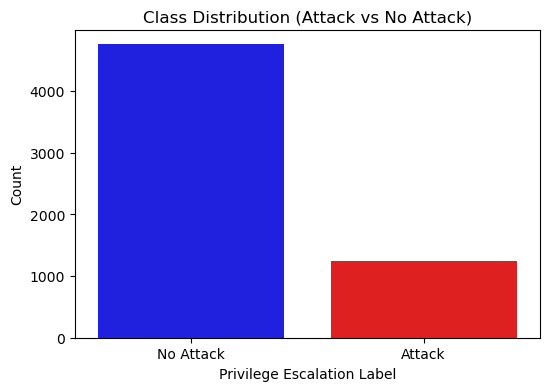

In [17]:
# Count the number of attack and no-attack records
attack_count = df["Privilege_Escalation_Label"].sum()
no_attack_count = len(df) - attack_count

print(f"No Attack Records: {no_attack_count}")
print(f"Attack Records: {attack_count}")

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Privilege_Escalation_Label"], hue=df["Privilege_Escalation_Label"], 
              palette={0: "blue", 1: "red"}, legend=False)

plt.title("Class Distribution (Attack vs No Attack)")
plt.xlabel("Privilege Escalation Label")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Attack", "Attack"])
plt.show()

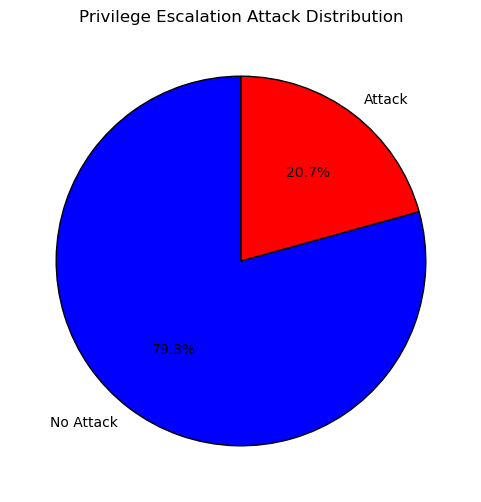

In [19]:
import matplotlib.pyplot as plt

# Count the number of attack and no-attack records
attack_count = df["Privilege_Escalation_Label"].sum()
no_attack_count = len(df) - attack_count

# Labels and values for the pie chart
labels = ["No Attack", "Attack"]
sizes = [no_attack_count, attack_count]
colors = ["blue", "red"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, 
        wedgeprops={"edgecolor": "black"})

plt.title("Privilege Escalation Attack Distribution")
plt.show()


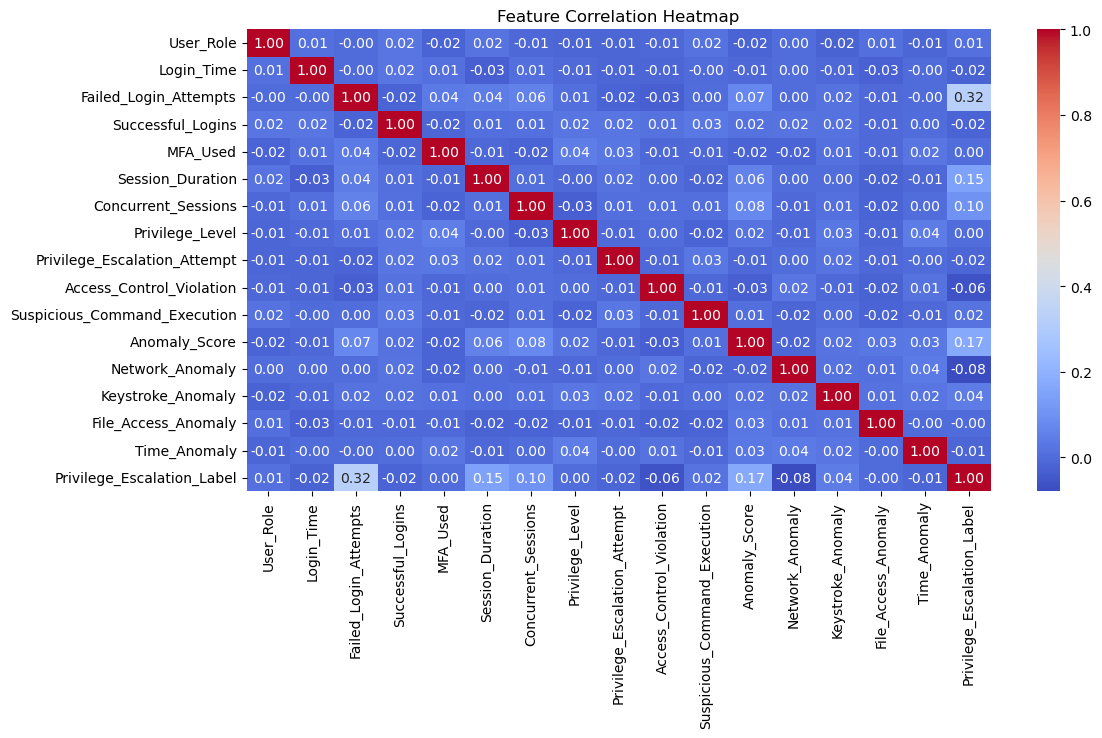


Data Analysis Complete!



In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

print("\nData Analysis Complete!\n")


In [23]:
# Feature Engineering
print("Creating new features...")
df["Login_Anomaly_Score"] = df["Failed_Login_Attempts"] * df["Anomaly_Score"]
df["Session_Keystroke_Anomaly"] = df["Session_Duration"] * df["Keystroke_Anomaly"]
df["Anomaly_Ratio"] = df["Failed_Login_Attempts"] / (df["Concurrent_Sessions"] + 1)

# Selected Features
selected_features = [
    "Failed_Login_Attempts", "Anomaly_Score", "Session_Duration", "Concurrent_Sessions",
    "Keystroke_Anomaly", "Suspicious_Command_Execution",
    "Access_Control_Violation", "Network_Anomaly", "Time_Anomaly",
    "Login_Anomaly_Score", "Session_Keystroke_Anomaly", "Anomaly_Ratio"
]


Creating new features...


In [25]:
X = df[selected_features]
y = df["Privilege_Escalation_Label"]

# Train-Test Split
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Data Shape:", X_train.shape, y_train.shape)
print(" Testing Data Shape:", X_test.shape, y_test.shape)
print("Data Splitting Complete!\n")


Splitting dataset into training and testing sets...
Training Data Shape: (4800, 12) (4800,)
 Testing Data Shape: (1200, 12) (1200,)
Data Splitting Complete!



/var/folders/kh/_1rs1c3n2md7mtlfr5ph_mvc0000gn/T/ipykernel_60732/3996286043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="coolwarm")
/var/folders/kh/_1rs1c3n2md7mtlfr5ph_mvc0000gn/T/ipykernel_60732/3996286043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axes[1], palette="coolwarm")


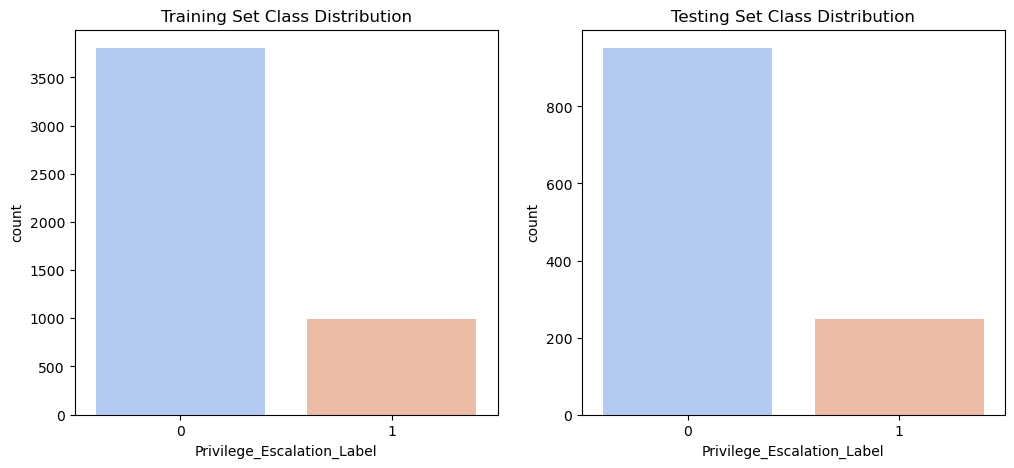

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

sns.countplot(x=y_train, ax=axes[0], palette="coolwarm")  
axes[0].set_title("Training Set Class Distribution")  

sns.countplot(x=y_test, ax=axes[1], palette="coolwarm")  
axes[1].set_title("Testing Set Class Distribution")  

plt.show()

In [27]:
# SMOTE for Balancing Data
print("Balancing dataset using SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Balancing dataset using SMOTE...


/var/folders/kh/_1rs1c3n2md7mtlfr5ph_mvc0000gn/T/ipykernel_60732/998641816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette="Set2")


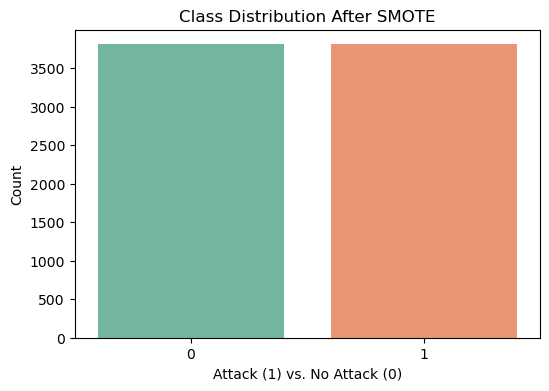

In [31]:
plt.figure(figsize=(6, 4))  
sns.countplot(x=y_train_balanced, palette="Set2")  
plt.title("Class Distribution After SMOTE")  
plt.xlabel("Attack (1) vs. No Attack (0)")  
plt.ylabel("Count")  
plt.show()

In [42]:
# Feature Scaling
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)
print("Feature Scaling Complete!\n")


Scaling features...
Feature Scaling Complete!



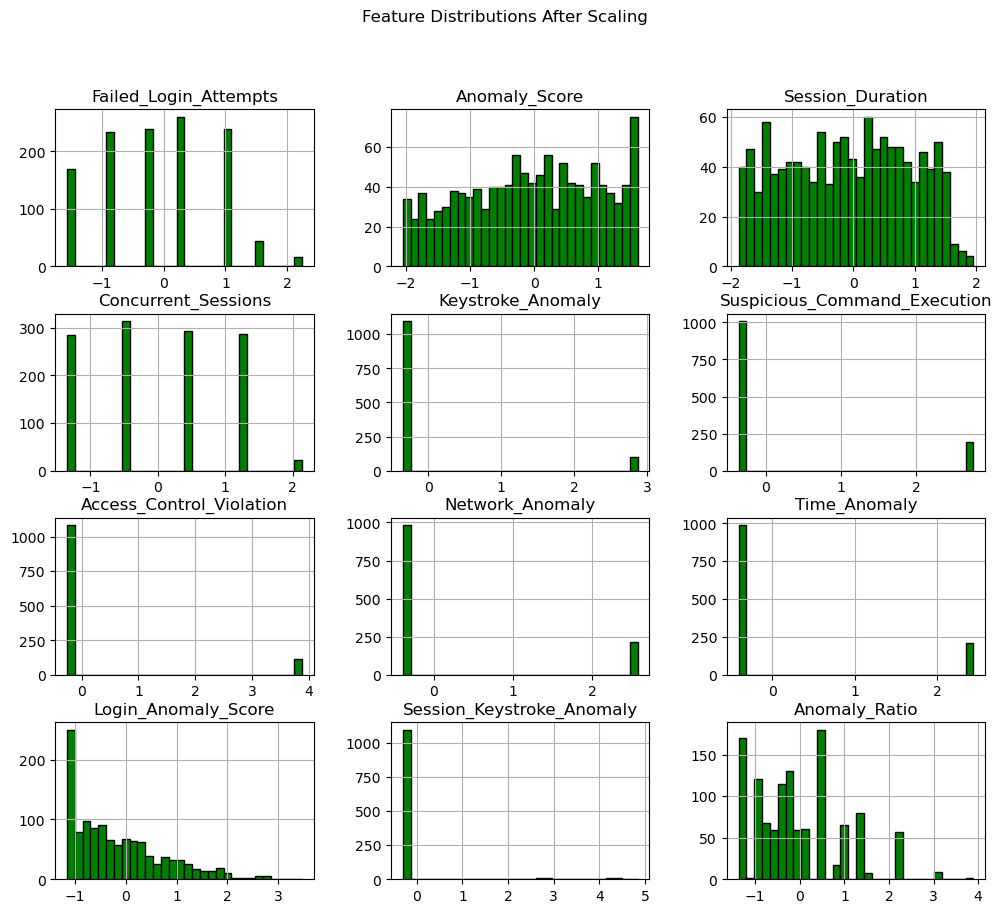

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_test was originally a pandas DataFrame with column names
# Convert X_test_scaled (NumPy array) back to a pandas DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Plot histograms using pandas .hist()
X_test_scaled_df.hist(figsize=(12, 10), bins=30, color="green", edgecolor="black")
plt.suptitle("Feature Distributions After Scaling")
plt.show()

In [79]:
# Define Advanced Algorithms
print("Initializing advanced machine learning models...")
random_forest = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
xgboost = XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=10, random_state=42, eval_metric="logloss")
lightgbm = LGBMClassifier(n_estimators=500, learning_rate=0.03, max_depth=10, random_state=42)
catboost = CatBoostClassifier(n_estimators=500, learning_rate=0.03, max_depth=10, verbose=0, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=10, random_state=42)


Initializing advanced machine learning models...


Training Random Forest...
Model: Random Forest
Accuracy: 0.8117
Precision: 0.5340
Recall: 0.6976
F1-Score: 0.6049

Detailed Classification Report for Random Forest:
               precision    recall  f1-score   support

   No Attack       0.91      0.84      0.88       952
      Attack       0.53      0.70      0.60       248

    accuracy                           0.81      1200
   macro avg       0.72      0.77      0.74      1200
weighted avg       0.84      0.81      0.82      1200



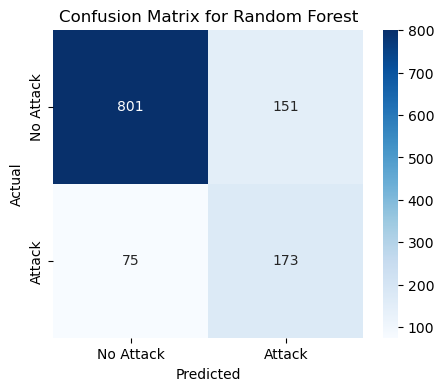



Training XGBoost...
Model: XGBoost
Accuracy: 0.8583
Precision: 0.6789
Recall: 0.5968
F1-Score: 0.6352

Detailed Classification Report for XGBoost:
               precision    recall  f1-score   support

   No Attack       0.90      0.93      0.91       952
      Attack       0.68      0.60      0.64       248

    accuracy                           0.86      1200
   macro avg       0.79      0.76      0.77      1200
weighted avg       0.85      0.86      0.85      1200



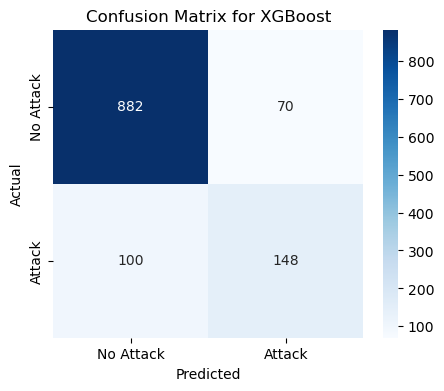



Training LightGBM...
[LightGBM] [Info] Number of positive: 3806, number of negative: 3806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 7612, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

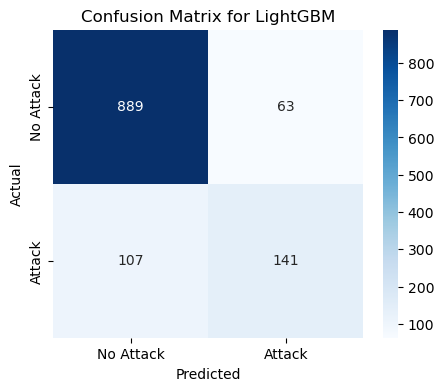



Training CatBoost...
Model: CatBoost
Accuracy: 0.8567
Precision: 0.6681
Recall: 0.6089
F1-Score: 0.6371

Detailed Classification Report for CatBoost:
               precision    recall  f1-score   support

   No Attack       0.90      0.92      0.91       952
      Attack       0.67      0.61      0.64       248

    accuracy                           0.86      1200
   macro avg       0.78      0.77      0.77      1200
weighted avg       0.85      0.86      0.85      1200



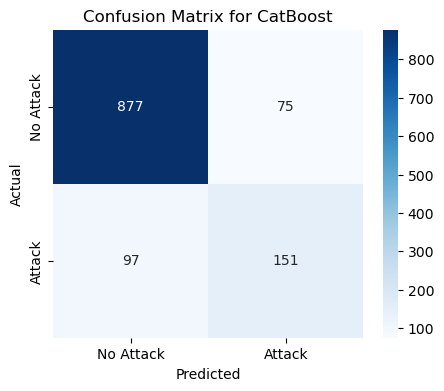



Training Gradient Boosting...
Model: Gradient Boosting
Accuracy: 0.8542
Precision: 0.6698
Recall: 0.5806
F1-Score: 0.6220

Detailed Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

   No Attack       0.89      0.93      0.91       952
      Attack       0.67      0.58      0.62       248

    accuracy                           0.85      1200
   macro avg       0.78      0.75      0.77      1200
weighted avg       0.85      0.85      0.85      1200



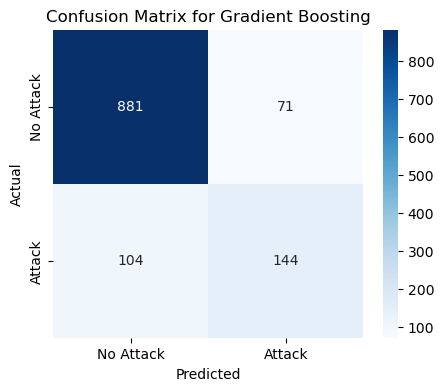




Overall Model Performance:

                   Accuracy  Precision    Recall  F1-Score
Random Forest      0.811667   0.533951  0.697581  0.604895
XGBoost            0.858333   0.678899  0.596774  0.635193
LightGBM           0.858333   0.691176  0.568548  0.623894
CatBoost           0.856667   0.668142  0.608871  0.637131
Gradient Boosting  0.854167   0.669767  0.580645  0.622030


In [83]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to store evaluation metrics
model_metrics = {}

# Define base models
base_models = {
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "Gradient Boosting": gradient_boosting
}

# Train and evaluate each base model
for name, model in base_models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_balanced)
    
    # Predict on validation/test set
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["No Attack", "Attack"], output_dict=True)
    
    precision = report["Attack"]["precision"]
    recall = report["Attack"]["recall"]
    f1_score = report["Attack"]["f1-score"]

    # Store metrics in dictionary
    model_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}\n")
    
    # Classification Report
    print(f"Detailed Classification Report for {name}:\n", classification_report(y_test, y_pred, target_names=["No Attack", "Attack"]))
    
    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    
    print("\n" + "="*50 + "\n")  # Separator for readability

# Convert model metrics dictionary into a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics).T
print("\nOverall Model Performance:\n")
print(metrics_df)


/var/folders/kh/_1rs1c3n2md7mtlfr5ph_mvc0000gn/T/ipykernel_60732/713964116.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


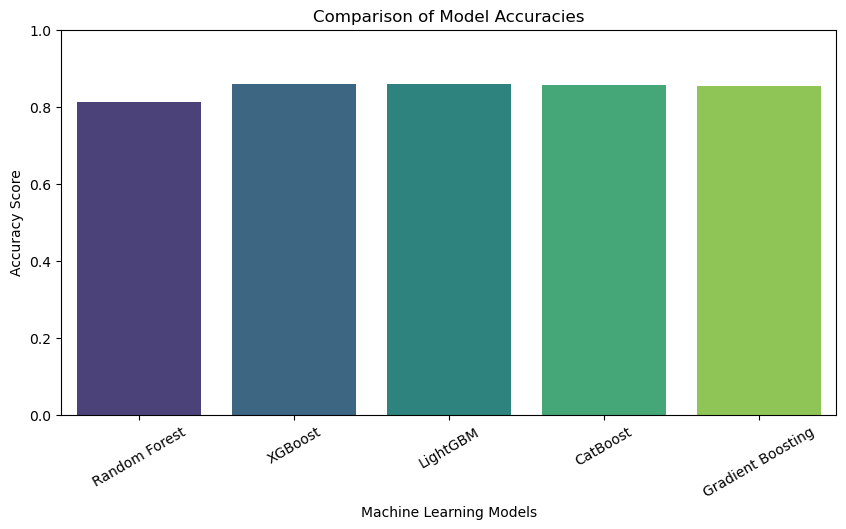

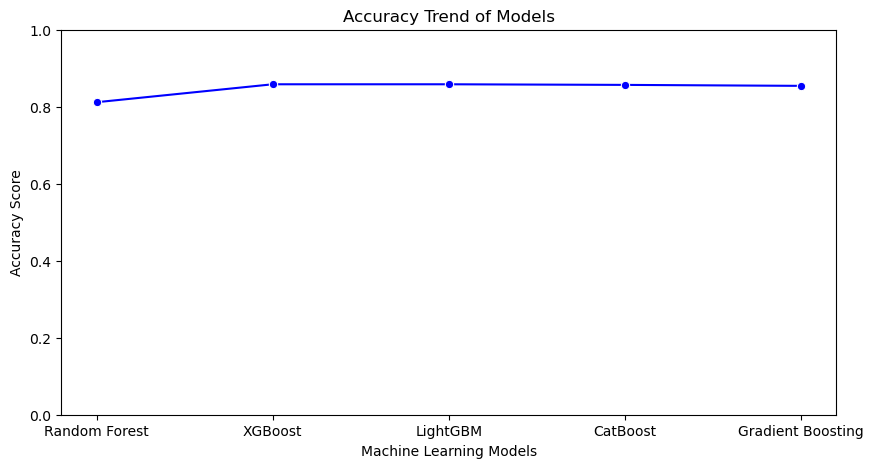

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the model names and their corresponding accuracies
model_names = ["Random Forest", "XGBoost", "LightGBM", "CatBoost", "Gradient Boosting"]
accuracies = [0.8117,0.8583, 0.8583, 0.8567, 0.8542]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x=model_names, y=accuracies, palette="viridis")

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=30)

# Show the plot
plt.show()

# Create a line plot for trend visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=model_names, y=accuracies, marker="o", linestyle="-", color="b")

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Trend of Models")
plt.ylim(0, 1)  # Accuracy range

# Show the plot
plt.show()


In [58]:
# Define and Train the Stacking Model
print("🔄 Building the Stacking Model...")
stacking_model = StackingClassifier(
    estimators=[
        ('RF', random_forest),
        ('XGB', xgboost),
        ('LGBM', lightgbm),
        ('CatBoost', catboost),

        ('GB', gradient_boosting)
    ],
    final_estimator=RandomForestClassifier(n_estimators=700, max_depth=25, random_state=42)
)

print("🚀 Training Stacking Model...")
stacking_model.fit(X_train_scaled, y_train_balanced)
print("✅ Training Complete!\n")


🔄 Building the Stacking Model...
🚀 Training Stacking Model...
[LightGBM] [Info] Number of positive: 3806, number of negative: 3806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 7612, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Making predictions on the test set...
Final Model Accuracy: 0.8700

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       952
           1       0.74      0.57      0.65       248

    accuracy                           0.87      1200
   macro avg       0.82      0.76      0.78      1200
weighted avg       0.86      0.87      0.86      1200



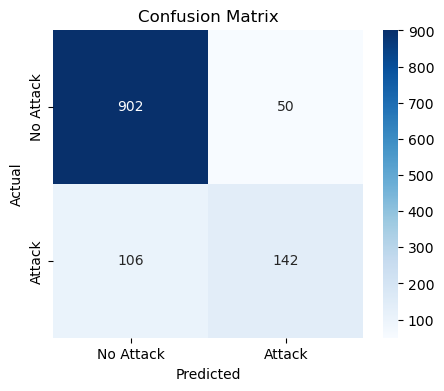

In [60]:
# Make Predictions
print("Making predictions on the test set...")
y_pred = stacking_model.predict(X_test_scaled)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [62]:
# Test on Sample Cases
print("Testing with sample cases...")
sample_data = [
    {"Failed_Login_Attempts": 7, "Anomaly_Score": 0.92, "Session_Duration": 80, "Concurrent_Sessions": 4, "Keystroke_Anomaly": 0.88, "Suspicious_Command_Execution": 1, "Access_Control_Violation": 1, "Network_Anomaly": 1, "Time_Anomaly": 1},
    {"Failed_Login_Attempts": 0, "Anomaly_Score": 0.05, "Session_Duration": 300, "Concurrent_Sessions": 1, "Keystroke_Anomaly": 0.02, "Suspicious_Command_Execution": 0, "Access_Control_Violation": 0, "Network_Anomaly": 0, "Time_Anomaly": 0}
]

sample_df = pd.DataFrame(sample_data)
sample_df["Login_Anomaly_Score"] = sample_df["Failed_Login_Attempts"] * sample_df["Anomaly_Score"]
sample_df["Session_Keystroke_Anomaly"] = sample_df["Session_Duration"] * sample_df["Keystroke_Anomaly"]
sample_df["Anomaly_Ratio"] = sample_df["Failed_Login_Attempts"] / (sample_df["Concurrent_Sessions"] + 1)
sample_X = sample_df[selected_features]

# Apply Scaling
sample_X_scaled = scaler.transform(sample_X)

# Make Predictions on Sample Cases
sample_predictions = stacking_model.predict(sample_X_scaled)

# Print Sample Predictions
for i, pred in enumerate(sample_predictions):
    print(f"Sample Case {i+1}: {'🔴 Privilege Escalation Attack Detected!' if pred == 1 else '🟢 No Attack Detected.'}")

print("End of Execution!")

Testing with sample cases...
Sample Case 1: 🔴 Privilege Escalation Attack Detected!
Sample Case 2: 🟢 No Attack Detected.
End of Execution!


In [114]:
import joblib

# Save model & scaler
joblib.dump(stacking_model, "privilege_escalation_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler saved!")

✅ Model and Scaler saved!
